## EECE5644 Assignment 2 - Question 4

#### Import libraries for visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#### Visualize decision regions for 2-class case

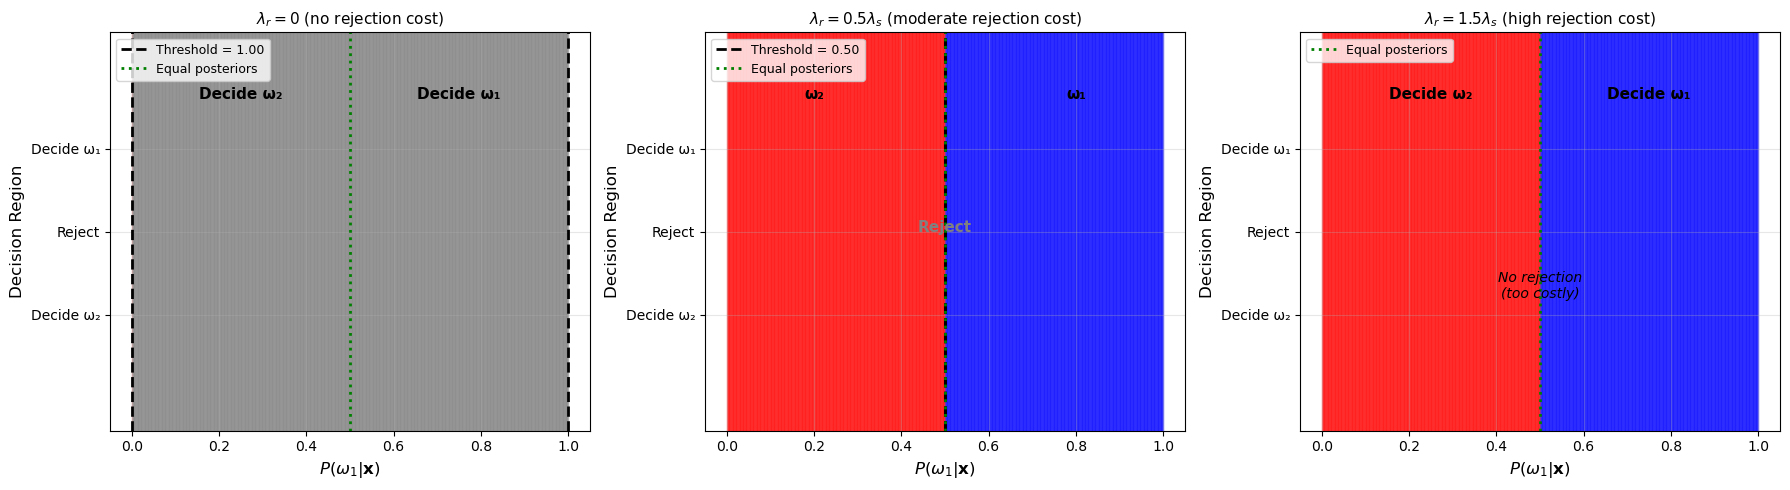


Visualization shows decision regions for different λ_r/λ_s ratios.


In [3]:
# Create visualization for 2-class problem
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define P(ω_1|x) along x-axis (P(ω_2|x) = 1 - P(ω_1|x))
p_omega1 = np.linspace(0, 1, 1000)

# Three scenarios: λ_r/λ_s = 0, 0.5, 1.5
scenarios = [
    (0, r"$\lambda_r = 0$ (no rejection cost)"),
    (0.5, r"$\lambda_r = 0.5\lambda_s$ (moderate rejection cost)"),
    (1.5, r"$\lambda_r = 1.5\lambda_s$ (high rejection cost)")
]

for idx, (ratio, title) in enumerate(scenarios):
    ax = axes[idx]
    threshold = 1 - ratio
    
    # Decision regions
    decisions = np.zeros_like(p_omega1)
    decisions[p_omega1 > 0.5] = 1  # Class 1 region (when P(ω_1|x) > P(ω_2|x))
    decisions[p_omega1 < 0.5] = -1  # Class 2 region (when P(ω_2|x) > P(ω_1|x))
    
    # Apply rejection rule
    if ratio < 1:
        # Reject when max posterior < threshold
        reject_mask = (p_omega1 < threshold) & (p_omega1 > 1 - threshold)
        decisions[reject_mask] = 0
    
    # Color mapping
    colors = np.where(decisions == 1, 'blue', 
                     np.where(decisions == -1, 'red', 'gray'))
    
    for i in range(len(p_omega1)-1):
        ax.axvspan(p_omega1[i], p_omega1[i+1], 
                  color=colors[i], alpha=0.3)
    
    # Add threshold lines
    if ratio < 1:
        ax.axvline(threshold, color='black', linestyle='--', 
                  linewidth=2, label=f'Threshold = {threshold:.2f}')
        ax.axvline(1-threshold, color='black', linestyle='--', linewidth=2)
    
    ax.axvline(0.5, color='green', linestyle=':', 
              linewidth=2, label='Equal posteriors')
    
    # Labels and styling
    ax.set_xlabel(r'$P(\omega_1|\mathbf{x})$', fontsize=12)
    ax.set_ylabel('Decision Region', fontsize=12)
    ax.set_title(title, fontsize=11)
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0.25, 0.5, 0.75])
    ax.set_yticklabels(['Decide ω₂', 'Reject', 'Decide ω₁'])
    ax.legend(loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Add text annotations
    if ratio == 0:
        ax.text(0.25, 0.9, 'Decide ω₂', ha='center', fontsize=11, weight='bold')
        ax.text(0.75, 0.9, 'Decide ω₁', ha='center', fontsize=11, weight='bold')
    elif ratio < 1:
        ax.text(0.2, 0.9, 'ω₂', ha='center', fontsize=11, weight='bold')
        ax.text(0.5, 0.5, 'Reject', ha='center', fontsize=11, weight='bold', color='gray')
        ax.text(0.8, 0.9, 'ω₁', ha='center', fontsize=11, weight='bold')
    else:
        ax.text(0.25, 0.9, 'Decide ω₂', ha='center', fontsize=11, weight='bold')
        ax.text(0.75, 0.9, 'Decide ω₁', ha='center', fontsize=11, weight='bold')
        ax.text(0.5, 0.3, 'No rejection\n(too costly)', ha='center', 
               fontsize=10, style='italic')

plt.tight_layout()
plt.show()

print("\nVisualization shows decision regions for different λ_r/λ_s ratios.")

### Special Cases Analysis

#### Case 1: $\lambda_r = 0$ (No cost for rejection)

In [4]:
print("Case 1: λ_r = 0")
print("="*50)
print("Threshold: P(ω_i|x) ≥ 1 - 0/λ_s = 1")
print("")
print("Result: ALWAYS REJECT")
print("")
print("Explanation:")
print("- Rejection has zero cost")
print("- Any classification risks substitution error (cost λ_s > 0)")
print("- Only classify if 100% certain (P(ω_i|x) = 1)")
print("- In practice with continuous distributions, this never happens")
print("- Therefore, reject everything to minimize risk")

Case 1: λ_r = 0
Threshold: P(ω_i|x) ≥ 1 - 0/λ_s = 1

Result: ALWAYS REJECT

Explanation:
- Rejection has zero cost
- Any classification risks substitution error (cost λ_s > 0)
- Only classify if 100% certain (P(ω_i|x) = 1)
- In practice with continuous distributions, this never happens
- Therefore, reject everything to minimize risk


#### Case 2: $\lambda_r > \lambda_s$ (Rejection more costly than errors)

In [5]:
print("Case 2: λ_r > λ_s")
print("="*50)
print("Threshold: P(ω_i|x) ≥ 1 - λ_r/λ_s < 0")
print("")
print("Result: NEVER REJECT")
print("")
print("Explanation:")
print("- Rejection cost exceeds substitution error cost")
print("- Threshold becomes negative (always satisfied since P ≥ 0)")
print("- Better to make substitution errors than reject")
print("- Reduces to standard minimum error classification")
print("- Decision rule: Choose i* = argmax_j P(ω_j|x)")
print("")
print("Example: Medical diagnosis where refusing to diagnose")
print("         is worse than making a treatable misdiagnosis")

Case 2: λ_r > λ_s
Threshold: P(ω_i|x) ≥ 1 - λ_r/λ_s < 0

Result: NEVER REJECT

Explanation:
- Rejection cost exceeds substitution error cost
- Threshold becomes negative (always satisfied since P ≥ 0)
- Better to make substitution errors than reject
- Reduces to standard minimum error classification
- Decision rule: Choose i* = argmax_j P(ω_j|x)

Example: Medical diagnosis where refusing to diagnose
         is worse than making a treatable misdiagnosis


#### Numerical example with 3 classes

In [6]:
# Numerical example
print("\nNumerical Example (3 classes):")
print("="*50)

# Set up parameters
lambda_s = 1.0
posteriors = np.array([0.45, 0.35, 0.20])

print(f"\nGiven posteriors: P(ω₁|x)={posteriors[0]}, P(ω₂|x)={posteriors[1]}, P(ω₃|x)={posteriors[2]}")
print(f"Substitution loss: λ_s = {lambda_s}")
print("\nMost probable class: ω₁ (P = 0.45)\n")

for lambda_r in [0.0, 0.3, 0.6, 0.8]:
    ratio = lambda_r / lambda_s
    threshold = 1 - ratio
    max_posterior = posteriors.max()
    
    print(f"λ_r = {lambda_r}:")
    print(f"  Threshold = 1 - {ratio:.2f} = {threshold:.2f}")
    print(f"  Max posterior = {max_posterior:.2f}")
    
    if max_posterior >= threshold:
        decision = np.argmax(posteriors) + 1
        print(f"  Decision: Classify as ω{decision} ✓")
    else:
        print(f"  Decision: REJECT ✗")
    print()


Numerical Example (3 classes):

Given posteriors: P(ω₁|x)=0.45, P(ω₂|x)=0.35, P(ω₃|x)=0.2
Substitution loss: λ_s = 1.0

Most probable class: ω₁ (P = 0.45)

λ_r = 0.0:
  Threshold = 1 - 0.00 = 1.00
  Max posterior = 0.45
  Decision: REJECT ✗

λ_r = 0.3:
  Threshold = 1 - 0.30 = 0.70
  Max posterior = 0.45
  Decision: REJECT ✗

λ_r = 0.6:
  Threshold = 1 - 0.60 = 0.40
  Max posterior = 0.45
  Decision: Classify as ω1 ✓

λ_r = 0.8:
  Threshold = 1 - 0.80 = 0.20
  Max posterior = 0.45
  Decision: Classify as ω1 ✓

